In [1]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Subset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cnn
import numpy as np
from datetime import datetime
import os 

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 1

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

val_idx = [i for i in range(7000)]
test_idx = [i for i in range(10_000)]

valset = torch.utils.data.Subset(testset, val_idx)
testset = torch.utils.data.Subset(testset, test_idx)


valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


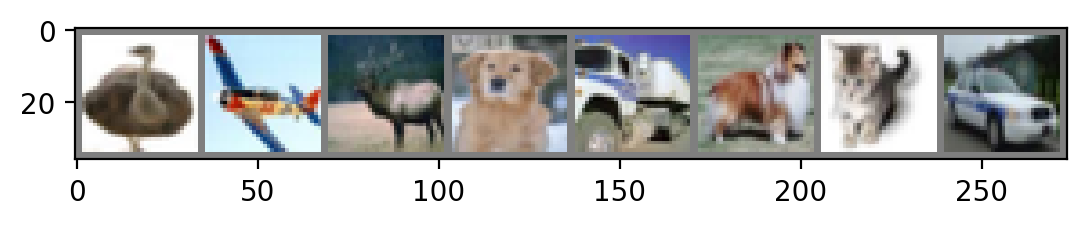

bird  plane deer  dog   truck dog   cat   car  


In [3]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
vgg = cnn.VGG(in_channels=3, batchnorm=False, dropout=True)
vgg.to(device)
criterion = nn.CrossEntropyLoss()
lr = 1e-3
epochs = 80
momentum = 0.9
optimizer = torch.optim.SGD(params=vgg.parameters(), momentum=momentum, lr=lr)
trainer = cnn.Trainer(model=vgg, train_dataloader=trainloader, val_dataloader=valloader, criterion=criterion, optimizer=optimizer, device=device, log_dir="check_overfits_small_train/", obj_performance=0.80)

path = 'models/vanilla_vgg_dropout_only/lr_' + str(lr) + '_bs_' + str(batch_size) + '_m_' + str(momentum) + '_n_epoch_' + str(epochs) + '_' + str(datetime.now()).replace(' ', '_').replace(':', '_').replace('.', '-')[:16]

train_loss_list, train_acc_list, val_loss_list, val_acc_list = trainer.train(epochs=epochs)

path += '_' + str(max(val_acc_list))[:5]
model_path = path + '_model.pth'
train_loss_path = path + '_train_loss.npy'
val_loss_path = path + '_val_loss.npy'
train_acc_path = path + '_train_acc.npy'
val_acc_path = path + '_val_acc.npy'

train_loss_list = np.array(train_loss_list)
train_acc_list = np.array(train_acc_list)
val_loss_list = np.array(val_loss_list)
val_acc_list = np.array(val_acc_list)

# Save all the model's output and the model

torch.save(vgg, model_path)

with open(train_loss_path, 'wb') as f:
    np.save(f, train_loss_list)

with open(val_loss_path, 'wb') as f:
    np.save(f, val_loss_list)

with open(train_acc_path, 'wb') as f:
    np.save(f, train_acc_list)

with open(val_acc_path, 'wb') as f:
    np.save(f, val_acc_list)

VGG model with dropout


  1%|▏         | 1/80 [00:50<1:06:21, 50.39s/it]

Epoch 1/80: Train Loss = 2.3026, Train Accuracy = 0.1503, Val Loss = 2.3026, Val Accuracy = 0.1690


  2%|▎         | 2/80 [01:35<1:01:15, 47.13s/it]

Epoch 2/80: Train Loss = 2.3026, Train Accuracy = 0.1742, Val Loss = 2.3026, Val Accuracy = 0.1923


  4%|▍         | 3/80 [02:24<1:02:00, 48.32s/it]

Epoch 3/80: Train Loss = 2.3025, Train Accuracy = 0.1890, Val Loss = 2.3025, Val Accuracy = 0.1981


  5%|▌         | 4/80 [03:13<1:01:17, 48.39s/it]

Epoch 4/80: Train Loss = 2.3025, Train Accuracy = 0.1956, Val Loss = 2.3025, Val Accuracy = 0.2079


  6%|▋         | 5/80 [04:02<1:00:54, 48.73s/it]

Epoch 5/80: Train Loss = 2.3024, Train Accuracy = 0.1946, Val Loss = 2.3023, Val Accuracy = 0.1923


  8%|▊         | 6/80 [04:51<1:00:06, 48.74s/it]

Epoch 6/80: Train Loss = 2.2986, Train Accuracy = 0.1835, Val Loss = 2.2319, Val Accuracy = 0.2050


  9%|▉         | 7/80 [05:37<58:18, 47.93s/it]  

Epoch 7/80: Train Loss = 2.1840, Train Accuracy = 0.2346, Val Loss = 2.1644, Val Accuracy = 0.2484


 10%|█         | 8/80 [06:26<57:49, 48.18s/it]

Epoch 8/80: Train Loss = 2.1501, Train Accuracy = 0.2698, Val Loss = 2.1418, Val Accuracy = 0.2747


 11%|█▏        | 9/80 [07:14<57:04, 48.23s/it]

Epoch 9/80: Train Loss = 2.1247, Train Accuracy = 0.2982, Val Loss = 2.1084, Val Accuracy = 0.3136


 12%|█▎        | 10/80 [08:04<56:43, 48.63s/it]

Epoch 10/80: Train Loss = 2.0891, Train Accuracy = 0.3347, Val Loss = 2.0739, Val Accuracy = 0.3524


 14%|█▍        | 11/80 [08:52<55:47, 48.52s/it]

Epoch 11/80: Train Loss = 2.0668, Train Accuracy = 0.3602, Val Loss = 2.0623, Val Accuracy = 0.3653


 15%|█▌        | 12/80 [09:37<53:51, 47.52s/it]

Epoch 12/80: Train Loss = 2.0489, Train Accuracy = 0.3763, Val Loss = 2.0422, Val Accuracy = 0.3864


 16%|█▋        | 13/80 [10:27<53:37, 48.02s/it]

Epoch 13/80: Train Loss = 2.0334, Train Accuracy = 0.3943, Val Loss = 2.0235, Val Accuracy = 0.4063


 18%|█▊        | 14/80 [11:15<53:06, 48.28s/it]

Epoch 14/80: Train Loss = 2.0168, Train Accuracy = 0.4183, Val Loss = 2.0004, Val Accuracy = 0.4349


 19%|█▉        | 15/80 [12:03<52:12, 48.19s/it]

Epoch 15/80: Train Loss = 1.9950, Train Accuracy = 0.4412, Val Loss = 1.9826, Val Accuracy = 0.4589


 20%|██        | 16/80 [12:53<51:57, 48.72s/it]

Epoch 16/80: Train Loss = 1.9779, Train Accuracy = 0.4624, Val Loss = 1.9684, Val Accuracy = 0.4706


 21%|██▏       | 17/80 [13:38<49:45, 47.38s/it]

Epoch 17/80: Train Loss = 1.9624, Train Accuracy = 0.4809, Val Loss = 1.9759, Val Accuracy = 0.4619


 22%|██▎       | 18/80 [14:27<49:28, 47.88s/it]

Epoch 18/80: Train Loss = 1.9505, Train Accuracy = 0.4938, Val Loss = 1.9613, Val Accuracy = 0.4859


 24%|██▍       | 19/80 [15:16<49:05, 48.28s/it]

Epoch 19/80: Train Loss = 1.9383, Train Accuracy = 0.5081, Val Loss = 1.9507, Val Accuracy = 0.4947


 25%|██▌       | 20/80 [16:05<48:28, 48.47s/it]

Epoch 20/80: Train Loss = 1.9302, Train Accuracy = 0.5161, Val Loss = 1.9487, Val Accuracy = 0.4996


 26%|██▋       | 21/80 [16:53<47:40, 48.48s/it]

Epoch 21/80: Train Loss = 1.9228, Train Accuracy = 0.5246, Val Loss = 1.9232, Val Accuracy = 0.5293


 28%|██▊       | 22/80 [17:37<45:29, 47.07s/it]

Epoch 22/80: Train Loss = 1.9137, Train Accuracy = 0.5366, Val Loss = 1.9228, Val Accuracy = 0.5277


 29%|██▉       | 23/80 [18:25<45:05, 47.47s/it]

Epoch 23/80: Train Loss = 1.9098, Train Accuracy = 0.5458, Val Loss = 1.9129, Val Accuracy = 0.5370


 30%|███       | 24/80 [19:14<44:31, 47.70s/it]

Epoch 24/80: Train Loss = 1.9010, Train Accuracy = 0.5499, Val Loss = 1.9057, Val Accuracy = 0.5470


 31%|███▏      | 25/80 [20:03<44:05, 48.10s/it]

Epoch 25/80: Train Loss = 1.8934, Train Accuracy = 0.5636, Val Loss = 1.9008, Val Accuracy = 0.5547


 32%|███▎      | 26/80 [20:52<43:38, 48.50s/it]

Epoch 26/80: Train Loss = 1.8876, Train Accuracy = 0.5698, Val Loss = 1.8995, Val Accuracy = 0.5537


 34%|███▍      | 27/80 [21:36<41:36, 47.10s/it]

Epoch 27/80: Train Loss = 1.8825, Train Accuracy = 0.5749, Val Loss = 1.8873, Val Accuracy = 0.5724


 35%|███▌      | 28/80 [22:25<41:25, 47.80s/it]

Epoch 28/80: Train Loss = 1.8778, Train Accuracy = 0.5844, Val Loss = 1.8984, Val Accuracy = 0.5561


 36%|███▋      | 29/80 [23:15<41:11, 48.46s/it]

Epoch 29/80: Train Loss = 1.8724, Train Accuracy = 0.5900, Val Loss = 1.8950, Val Accuracy = 0.5696


 38%|███▊      | 30/80 [24:04<40:23, 48.47s/it]

Epoch 30/80: Train Loss = 1.8685, Train Accuracy = 0.5949, Val Loss = 1.8807, Val Accuracy = 0.5769


 39%|███▉      | 31/80 [24:54<39:54, 48.87s/it]

Epoch 31/80: Train Loss = 1.8649, Train Accuracy = 0.6008, Val Loss = 1.8802, Val Accuracy = 0.5793


 40%|████      | 32/80 [25:40<38:27, 48.07s/it]

Epoch 32/80: Train Loss = 1.8575, Train Accuracy = 0.6089, Val Loss = 1.8857, Val Accuracy = 0.5783


 41%|████▏     | 33/80 [26:28<37:42, 48.13s/it]

Epoch 33/80: Train Loss = 1.8547, Train Accuracy = 0.6130, Val Loss = 1.8668, Val Accuracy = 0.5933


 42%|████▎     | 34/80 [27:17<37:00, 48.28s/it]

Epoch 34/80: Train Loss = 1.8519, Train Accuracy = 0.6165, Val Loss = 1.8697, Val Accuracy = 0.5936


 44%|████▍     | 35/80 [28:05<36:14, 48.33s/it]

Epoch 35/80: Train Loss = 1.8474, Train Accuracy = 0.6193, Val Loss = 1.8688, Val Accuracy = 0.5961


 45%|████▌     | 36/80 [28:55<35:46, 48.79s/it]

Epoch 36/80: Train Loss = 1.8454, Train Accuracy = 0.6235, Val Loss = 1.8647, Val Accuracy = 0.6043


 46%|████▋     | 37/80 [29:40<34:07, 47.61s/it]

Epoch 37/80: Train Loss = 1.8440, Train Accuracy = 0.6270, Val Loss = 1.8687, Val Accuracy = 0.6013


 48%|████▊     | 38/80 [30:30<33:48, 48.31s/it]

Epoch 38/80: Train Loss = 1.8398, Train Accuracy = 0.6327, Val Loss = 1.8600, Val Accuracy = 0.6101


 49%|████▉     | 39/80 [31:19<33:09, 48.53s/it]

Epoch 39/80: Train Loss = 1.8348, Train Accuracy = 0.6399, Val Loss = 1.8535, Val Accuracy = 0.6117


 50%|█████     | 40/80 [32:08<32:28, 48.71s/it]

Epoch 40/80: Train Loss = 1.8355, Train Accuracy = 0.6374, Val Loss = 1.8588, Val Accuracy = 0.6114


 51%|█████▏    | 41/80 [32:58<31:56, 49.14s/it]

Epoch 41/80: Train Loss = 1.8301, Train Accuracy = 0.6486, Val Loss = 1.8586, Val Accuracy = 0.6081


 52%|█████▎    | 42/80 [33:44<30:23, 47.97s/it]

Epoch 42/80: Train Loss = 1.8278, Train Accuracy = 0.6491, Val Loss = 1.8468, Val Accuracy = 0.6256


 54%|█████▍    | 43/80 [34:32<29:43, 48.19s/it]

Epoch 43/80: Train Loss = 1.8254, Train Accuracy = 0.6505, Val Loss = 1.8498, Val Accuracy = 0.6239


 55%|█████▌    | 44/80 [35:23<29:18, 48.84s/it]

Epoch 44/80: Train Loss = 1.8199, Train Accuracy = 0.6592, Val Loss = 1.8550, Val Accuracy = 0.6150


 56%|█████▋    | 45/80 [36:12<28:37, 49.08s/it]

Epoch 45/80: Train Loss = 1.8218, Train Accuracy = 0.6573, Val Loss = 1.8462, Val Accuracy = 0.6260


 57%|█████▊    | 46/80 [37:02<27:54, 49.24s/it]

Epoch 46/80: Train Loss = 1.8169, Train Accuracy = 0.6653, Val Loss = 1.8534, Val Accuracy = 0.6211


 59%|█████▉    | 47/80 [37:52<27:10, 49.42s/it]

Epoch 47/80: Train Loss = 1.8133, Train Accuracy = 0.6672, Val Loss = 1.8397, Val Accuracy = 0.6319


 60%|██████    | 48/80 [38:36<25:33, 47.92s/it]

Epoch 48/80: Train Loss = 1.8148, Train Accuracy = 0.6686, Val Loss = 1.8434, Val Accuracy = 0.6261


 61%|██████▏   | 49/80 [39:26<25:05, 48.56s/it]

Epoch 49/80: Train Loss = 1.8137, Train Accuracy = 0.6669, Val Loss = 1.8462, Val Accuracy = 0.6259


 62%|██████▎   | 50/80 [40:14<24:12, 48.42s/it]

Epoch 50/80: Train Loss = 1.8100, Train Accuracy = 0.6751, Val Loss = 1.8423, Val Accuracy = 0.6364


 64%|██████▍   | 51/80 [41:05<23:41, 49.01s/it]

Epoch 51/80: Train Loss = 1.8064, Train Accuracy = 0.6806, Val Loss = 1.8398, Val Accuracy = 0.6356


 65%|██████▌   | 52/80 [41:54<22:55, 49.11s/it]

Epoch 52/80: Train Loss = 1.8058, Train Accuracy = 0.6817, Val Loss = 1.8444, Val Accuracy = 0.6316


 66%|██████▋   | 53/80 [42:41<21:45, 48.35s/it]

Epoch 53/80: Train Loss = 1.8066, Train Accuracy = 0.6803, Val Loss = 1.8502, Val Accuracy = 0.6267


 68%|██████▊   | 54/80 [43:30<21:04, 48.62s/it]

Epoch 54/80: Train Loss = 1.8031, Train Accuracy = 0.6854, Val Loss = 1.8465, Val Accuracy = 0.6306


 69%|██████▉   | 55/80 [44:19<20:18, 48.74s/it]

Epoch 55/80: Train Loss = 1.8029, Train Accuracy = 0.6864, Val Loss = 1.8393, Val Accuracy = 0.6371


 70%|███████   | 56/80 [45:08<19:35, 48.97s/it]

Epoch 56/80: Train Loss = 1.8007, Train Accuracy = 0.6902, Val Loss = 1.8426, Val Accuracy = 0.6359


 71%|███████▏  | 57/80 [45:59<18:55, 49.35s/it]

Epoch 57/80: Train Loss = 1.7976, Train Accuracy = 0.6946, Val Loss = 1.8411, Val Accuracy = 0.6391


 72%|███████▎  | 58/80 [46:47<17:57, 48.99s/it]

Epoch 58/80: Train Loss = 1.7960, Train Accuracy = 0.6952, Val Loss = 1.8448, Val Accuracy = 0.6406


 74%|███████▍  | 59/80 [47:34<16:59, 48.54s/it]

Epoch 59/80: Train Loss = 1.7910, Train Accuracy = 0.7029, Val Loss = 1.8473, Val Accuracy = 0.6310


 75%|███████▌  | 60/80 [48:24<16:17, 48.89s/it]

Epoch 60/80: Train Loss = 1.7928, Train Accuracy = 0.7021, Val Loss = 1.8445, Val Accuracy = 0.6320


 76%|███████▋  | 61/80 [49:13<15:32, 49.07s/it]

Epoch 61/80: Train Loss = 1.7902, Train Accuracy = 0.7043, Val Loss = 1.8358, Val Accuracy = 0.6446


 78%|███████▊  | 62/80 [50:03<14:48, 49.37s/it]

Epoch 62/80: Train Loss = 1.7863, Train Accuracy = 0.7097, Val Loss = 1.8476, Val Accuracy = 0.6323


 79%|███████▉  | 63/80 [50:53<13:57, 49.26s/it]

Epoch 63/80: Train Loss = 1.7862, Train Accuracy = 0.7106, Val Loss = 1.8490, Val Accuracy = 0.6353


 80%|████████  | 64/80 [51:38<12:51, 48.20s/it]

Epoch 64/80: Train Loss = 1.7874, Train Accuracy = 0.7127, Val Loss = 1.8338, Val Accuracy = 0.6474


 81%|████████▏ | 65/80 [52:27<12:07, 48.51s/it]

Epoch 65/80: Train Loss = 1.7832, Train Accuracy = 0.7141, Val Loss = 1.8377, Val Accuracy = 0.6463


 82%|████████▎ | 66/80 [53:17<11:22, 48.75s/it]

Epoch 66/80: Train Loss = 1.7824, Train Accuracy = 0.7199, Val Loss = 1.8399, Val Accuracy = 0.6384


 84%|████████▍ | 67/80 [54:06<10:37, 49.01s/it]

Epoch 67/80: Train Loss = 1.7817, Train Accuracy = 0.7203, Val Loss = 1.8453, Val Accuracy = 0.6370


 85%|████████▌ | 68/80 [54:54<09:44, 48.74s/it]

Epoch 68/80: Train Loss = 1.7809, Train Accuracy = 0.7223, Val Loss = 1.8477, Val Accuracy = 0.6346


 86%|████████▋ | 69/80 [55:39<08:43, 47.57s/it]

Epoch 69/80: Train Loss = 1.7796, Train Accuracy = 0.7247, Val Loss = 1.8386, Val Accuracy = 0.6441


 88%|████████▊ | 70/80 [56:28<08:00, 48.03s/it]

Epoch 70/80: Train Loss = 1.7807, Train Accuracy = 0.7252, Val Loss = 1.8403, Val Accuracy = 0.6424


 89%|████████▉ | 71/80 [57:18<07:15, 48.36s/it]

Epoch 71/80: Train Loss = 1.7770, Train Accuracy = 0.7296, Val Loss = 1.8427, Val Accuracy = 0.6399


 90%|█████████ | 72/80 [58:08<06:31, 48.97s/it]

Epoch 72/80: Train Loss = 1.7775, Train Accuracy = 0.7271, Val Loss = 1.8401, Val Accuracy = 0.6441


 91%|█████████▏| 73/80 [58:58<05:44, 49.21s/it]

Epoch 73/80: Train Loss = 1.7736, Train Accuracy = 0.7362, Val Loss = 1.8407, Val Accuracy = 0.6483


 92%|█████████▎| 74/80 [59:49<04:59, 49.87s/it]

Epoch 74/80: Train Loss = 1.7757, Train Accuracy = 0.7328, Val Loss = 1.8424, Val Accuracy = 0.6384


 94%|█████████▍| 75/80 [1:00:36<04:04, 48.83s/it]

Epoch 75/80: Train Loss = 1.7735, Train Accuracy = 0.7351, Val Loss = 1.8392, Val Accuracy = 0.6476


 95%|█████████▌| 76/80 [1:01:25<03:16, 49.01s/it]

Epoch 76/80: Train Loss = 1.7696, Train Accuracy = 0.7429, Val Loss = 1.8414, Val Accuracy = 0.6459


 96%|█████████▋| 77/80 [1:02:16<02:28, 49.52s/it]

Epoch 77/80: Train Loss = 1.7715, Train Accuracy = 0.7422, Val Loss = 1.8431, Val Accuracy = 0.6451


 98%|█████████▊| 78/80 [1:03:07<01:40, 50.05s/it]

Epoch 78/80: Train Loss = 1.7714, Train Accuracy = 0.7435, Val Loss = 1.8343, Val Accuracy = 0.6484


In [ ]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)

In [ ]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)

In [ ]:
new_train_acc = np.load(train_acc_path)
plt.plot(new_train_acc)